In [ ]:
import numpy as np
import pandas as pd

In [1733]:
data = pd.read_csv('train.csv')

In [ ]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [1735]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [1736]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [1737]:
data = data.drop('Healthcare_1', axis=1)

In [1738]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


In [1739]:
data.shape

(10000, 19)

In [1740]:
data['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [1741]:
data.loc[data['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [1742]:
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968

In [1743]:
data.loc[data['Id'] == 11607, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,1968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [1744]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2008

In [1745]:
data.loc[data['Id'] == 10814, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.26507,20.239714,9.0,9,12.0,2008,0.13633,B,B,30,6141,10,3,6,B,254084.534396


In [1746]:
data['HouseYear'].describe()

count    10000.00000
mean      1984.86600
std         18.41187
min       1910.00000
25%       1974.00000
50%       1977.00000
75%       2001.00000
max       2020.00000
Name: HouseYear, dtype: float64

#### Rooms

In [1747]:
data['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [1748]:
data.loc[data['Rooms'] > 6, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [1749]:
data.loc[data['Rooms'] == 10, 'Rooms'] = 2

In [1750]:
data.loc[data['Rooms'] == 19, 'Rooms'] = 1

In [1751]:
data.loc[data['Id'].isin([5927, 8491, 14865]), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,2.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,1.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
8849,14865,9,2.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


#### Price

In [1752]:
data['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

#### Square, LifeSquare

In [1753]:
index_arr1 = data.loc[(data['LifeSquare'] - data['Square']) > 5, :].index

In [1754]:
data.loc[index_arr1, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,0,2,B,141780.231857
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,0,0,B,217357.492366
4638,4071,6,3.0,75.203314,82.486992,1.0,13,25.0,2015,0.243205,B,B,5,1564,0,0,0,B,211324.917957
6332,8961,27,1.0,33.398983,164.153360,6.0,3,5.0,1965,0.211401,B,B,9,1892,0,0,1,B,104891.073757
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,1,7,B,394253.299978


In [1755]:
data.loc[data['Square'] > (data['Rooms'] * 40 + 40), 'Square'] = data['Rooms'] * 40 + 40

In [1756]:
data.loc[data['Square'] < (data['Rooms'] * 15), 'Square'] = data['Rooms'] * 15

In [1757]:
data.loc[(~data['Square'].between(30, 100)) & (data['Rooms'] == 2), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
907,9353,69,2.0,101.348506,53.867589,14.0,12,12.0,2010,0.000991,B,B,33,6783,3,1,9,B,376318.769321
2839,1153,17,2.0,100.751999,102.024454,1.0,12,21.0,2015,0.000000,B,B,25,5027,4,1,1,B,560453.414813
3431,7111,27,2.0,120.000000,89.787666,42.0,5,3.0,2016,0.014073,B,B,2,475,0,0,0,B,153946.777452
4262,28,9,2.0,120.000000,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,2,4,B,187717.242538
4347,10211,62,2.0,103.621764,NaN,1.0,11,1.0,1977,0.072158,B,B,2,629,1,0,0,A,343956.405077
5350,5030,17,2.0,102.683649,101.525114,1.0,20,1.0,1977,0.093443,B,B,23,4635,5,2,4,B,573999.459148
5421,1205,23,2.0,120.000000,100.201652,1.0,1,3.0,2013,0.014073,B,B,2,475,0,0,0,B,152464.848743
5494,300,31,2.0,106.427686,34.230415,32.0,4,40.0,2013,0.151346,B,A,32,5889,10,4,1,B,624549.354546
6459,3302,30,2.0,104.511894,86.460171,6.0,25,39.0,2009,0.000078,B,B,22,6398,141,3,23,B,193885.918114
6977,11602,30,2.0,120.000000,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,3,23,B,133529.681562


In [1758]:
data.loc[data['Square'] < data['LifeSquare'], 'LifeSquare'] = data['Square']

In [1759]:
data['Square'].describe()

count    10000.000000
mean        56.060633
std         18.629678
min          2.377248
25%         41.780320
50%         52.509275
75%         65.894295
max        240.000000
Name: Square, dtype: float64

In [1760]:
data.loc[data['Square'] < 15, 'Square'] = 15

In [1761]:
data['LifeSquare'].describe()

count    7887.000000
mean       35.862177
std        17.301716
min         0.370619
25%        22.767925
50%        32.765469
75%        45.018374
max       233.949309
Name: LifeSquare, dtype: float64

In [1762]:
data.loc[data['LifeSquare'] < 15, 'LifeSquare'] = data['Square']

In [1763]:
data['LifeSquare'].describe()

count    7887.000000
mean       37.371417
std        17.021387
min        15.000000
25%        23.538881
50%        33.413218
75%        45.725299
max       233.949309
Name: LifeSquare, dtype: float64

In [1764]:
data['LifeSquare'] = data['LifeSquare'].fillna(data['Square'])

In [1765]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


#### Floor

In [1766]:
data.loc[data['Floor'] > data['HouseFloor'], :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,80.312926,0.0,14,0.0,1977,7.577876e-02,B,B,6,1437,3,0,2,B,221244.156664
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,7.215758e-02,B,B,2,629,1,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,5.181543e-02,B,B,5,1227,0,0,0,B,117000.381287
21,11935,27,2.0,64.711835,64.711835,1.0,15,1.0,1977,2.114012e-01,B,B,9,1892,0,0,1,B,127200.026511
23,6641,54,3.0,118.907612,118.907612,0.0,2,0.0,1977,6.076152e-03,B,B,30,5285,0,6,6,B,571069.052600
26,4378,27,3.0,106.958871,106.958871,0.0,17,0.0,2018,7.215758e-02,B,B,2,629,1,0,0,A,337299.867936
35,6486,200,3.0,85.280389,58.447967,9.0,6,5.0,1960,0.000000e+00,B,B,33,7425,1,2,5,B,402871.916317
39,9371,23,2.0,60.503248,60.503248,0.0,16,0.0,1977,3.465608e-02,B,B,0,168,0,0,0,B,229778.057902
44,10521,38,3.0,104.211396,104.211396,0.0,20,0.0,2017,6.075305e-02,B,B,15,2787,2,0,7,B,435462.048070
51,10103,94,1.0,35.280894,23.354176,6.0,11,9.0,1971,2.827977e-01,B,B,33,8667,2,0,6,B,148862.210174


In [1767]:
np.round(data.loc[data['HouseFloor'] != 0, 'HouseFloor'].mean())

13.0

In [1768]:
data.loc[data['HouseFloor'] == 0, 'HouseFloor'] = np.round(data.loc[data['HouseFloor'] != 0, 'HouseFloor'].mean())

In [1769]:
data.loc[data['Floor'] > data['HouseFloor'], 'Floor'] = data['HouseFloor']

In [1770]:
data['Floor'].describe()

count    10000.000000
mean         7.918200
std          5.186386
min          1.000000
25%          4.000000
50%          7.000000
75%         11.000000
max         42.000000
Name: Floor, dtype: float64

In [1771]:
data['HouseFloor'].describe()

count    10000.00000
mean        12.95910
std          6.44346
min          1.00000
25%          9.00000
50%         13.00000
75%         17.00000
max        117.00000
Name: HouseFloor, dtype: float64

In [1772]:
data['HouseYear'].describe()

count    10000.00000
mean      1984.86600
std         18.41187
min       1910.00000
25%       1974.00000
50%       1977.00000
75%       2001.00000
max       2020.00000
Name: HouseYear, dtype: float64

In [1773]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,B,B,33,7976,5,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,B,B,46,10309,1,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8.0,12.0,1968,0.049637,B,B,34,7759,0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,B,B,23,5735,3,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,B,B,35,5776,1,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5.0,17.0,2011,0.309479,B,B,35,7715,4,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3.0,5.0,1960,0.460556,B,B,20,4386,14,1,5,B,296021.204377
7,11993,74,2.0,80.312926,80.312926,0.0,13.0,13.0,1977,0.075779,B,B,6,1437,3,0,2,B,221244.156664
8,5172,1,2.0,64.511437,64.511437,1.0,9.0,17.0,1977,0.007122,B,B,1,264,0,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13.0,17.0,2014,0.075779,B,B,6,1437,3,0,2,B,95380.220993


In [1774]:
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


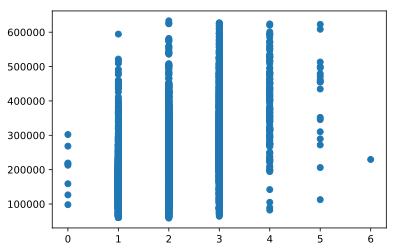

In [1775]:
plt.scatter(data['Rooms'], data['Price']);


In [1776]:
data.loc[(data['Rooms']>5)  ,'Rooms']=2

(array([ 274.,  643., 1143., 1649., 1906., 1262.,  889.,  545.,  396.,
         335.,  251.,  186.,  148.,  106.,   87.,   67.,   43.,   29.,
          23.,   18.]),
 array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
        173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
        288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
        403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
        518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
        633233.46656995]),
 <a list of 20 Patch objects>)

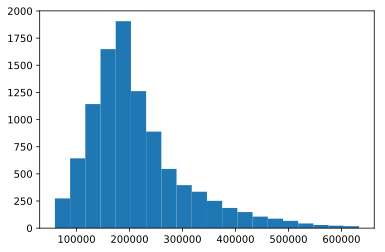

In [1777]:
plt.hist(data['Price'], bins=20)

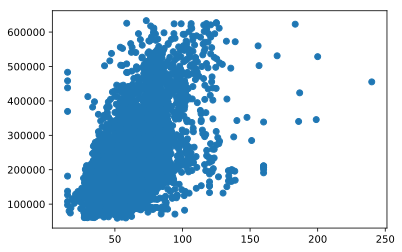

In [1778]:
plt.scatter(data.loc[data['Square'] < 250, 'Square'], 
            data.loc[data['Square'] < 250, 'Price'])

In [1779]:
data = pd.get_dummies(data)


In [1780]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,33,7976,5,0,11,184966.930730,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,46,10309,1,1,16,300009.450063,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8.0,12.0,1968,0.049637,34,7759,0,1,3,220925.908524,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,23,5735,3,0,5,175616.227217,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,35,5776,1,2,4,150226.531644,0,1,0,1,0,1


In [1781]:
mean_price = data.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price': 'mean_price'})


In [1782]:
mean_price

,DistrictId,Rooms,mean_price
0,0,1.0,141262.601991
1,0,2.0,197998.146681
2,0,3.0,304170.518823
3,1,1.0,147186.814704
4,1,2.0,198777.278269
5,1,3.0,246262.924161
6,1,4.0,277290.705058
7,2,1.0,177871.758149
8,2,2.0,243022.112038
9,2,3.0,342699.342039


In [1783]:
data = pd.merge(data, mean_price, on=['DistrictId', 'Rooms'], how='left')

In [1784]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,33,7976,5,0,11,184966.930730,0,1,0,1,0,1,213160.076297
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,46,10309,1,1,16,300009.450063,0,1,0,1,0,1,303643.563728
2,4765,53,2.0,44.947953,29.197612,0.0,8.0,12.0,1968,0.049637,34,7759,0,1,3,220925.908524,0,1,0,1,0,1,259938.729121
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,23,5735,3,0,5,175616.227217,0,1,0,1,0,1,172368.882269
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,35,5776,1,2,4,150226.531644,0,1,0,1,0,1,155748.415754


In [1785]:
data.to_pickle('project.pkl')

In [1786]:
data=pd.read_pickle('project.pkl')

In [1787]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,33,7976,5,0,11,184966.930730,0,1,0,1,0,1,213160.076297
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,46,10309,1,1,16,300009.450063,0,1,0,1,0,1,303643.563728
2,4765,53,2.0,44.947953,29.197612,0.0,8.0,12.0,1968,0.049637,34,7759,0,1,3,220925.908524,0,1,0,1,0,1,259938.729121
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,23,5735,3,0,5,175616.227217,0,1,0,1,0,1,172368.882269
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,35,5776,1,2,4,150226.531644,0,1,0,1,0,1,155748.415754


In [1788]:
test=pd.read_csv('test.csv')

In [1789]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [1790]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [1791]:
test.drop('Healthcare_1',axis=1,inplace=True)

In [1792]:
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(6), int64(9), object(3)
memory usage: 703.2+ KB


In [1793]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.00000,23.000000


In [1794]:
test.loc[test['Rooms']>5,:]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
2071,10793,23,6.0,110.750226,NaN,0.0,2,2.0,2015,0.014073,B,B,2,475,0,0,0,B
3217,4058,27,6.0,223.453689,104.113552,16.0,2,2.0,2017,0.041116,B,B,53,14892,4,1,4,B
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,2,4,B


In [1795]:
test.loc[test['Rooms']==17,'Rooms']=1.0
test.loc[test['Id']==10793,'Rooms']=5
test.loc[test['Id']==1435,'Rooms']=2

In [1796]:
def prepare_square(df):
    df.loc[df['Square'] > (df['Rooms'] * 40 + 40), 'Square'] = df['Rooms'] * 40 + 40
    df.loc[df['Square'] < (df['Rooms'] * 15), 'Square'] = df['Rooms'] * 15
    return df

In [1797]:
def prepare_lifesquare(df):
    df.loc[df['Square'] < df['LifeSquare'], 'LifeSquare'] = df['Square']
    return df

In [1798]:
test=prepare_square(test)

In [1799]:
test=prepare_lifesquare(test)

In [1800]:
test['LifeSquare'] = test['LifeSquare'].fillna(test['Square'])
test.loc[test['Square'] < 15, 'Square'] = 15
test.loc[test['LifeSquare'] < 15, 'LifeSquare'] = test['Square']

In [1801]:
test.loc[data['HouseFloor'] == 0, 'HouseFloor'] = np.round(test.loc[test['HouseFloor'] != 0, 'HouseFloor'].mean())

In [1802]:
test.loc[test['Floor'] > test['HouseFloor'], 'Floor'] = test['HouseFloor']

In [1803]:
test=pd.get_dummies(test)

In [1804]:
test=pd.merge(test,mean_price,on=['DistrictId','Rooms'],how='left')

In [1805]:
n_rooms= test.loc[test['mean_price'].isnull(),'Rooms'].values
mean_for_room=np.array([data.loc[data['Rooms']==room,'mean_price'].mean() for room in n_rooms])


In [1806]:
test.loc[test['mean_price'].isnull(),'mean_price']=mean_for_room


In [1807]:
test.loc[test['mean_price'].isnull(),'mean_price']=data['mean_price'].max()

In [1808]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
scaler = StandardScaler()

In [1810]:
data= (data.set_index(data['Id'],drop=True)).drop('Id',axis=1)

In [1809]:
def score_for_solver(x_train,x_test,y_train,y_test,solver):
    solver.fit(x_train,y_train)
    y_pred = solver.predict(x_test)
    return r2_score(y_test,y_pred)
    


In [1822]:
X_train, X_test, y_train, y_test = train_test_split(data.loc[:,data.columns!='Price']
                                                             ,data['Price'], test_size=0.25, random_state=42)

In [1823]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [1824]:
score_for_solver(X_train, X_test, y_train, y_test,lr)

0.6952407525948981

In [1825]:
X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)



C:\Users\valle\.conda\envs\py_for_ds\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\valle\.conda\envs\py_for_ds\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\valle\.conda\envs\py_for_ds\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [1828]:
score_for_solver(X_train_scaled, X_test_scaled, y_train, y_test,lr)

0.695338917479354

In [1829]:
from sklearn.linear_model import Lasso, Ridge

In [1892]:
score_for_solver(X_train_scaled, X_test_scaled, y_train, y_test,Lasso(alpha=190))

0.6954820083825897

In [1894]:
score_for_solver(X_train, X_test, y_train, y_test,Lasso(alpha=190))

0.6952498790697936

In [1914]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators': [150, 200, 250], 
               'max_features': np.arange(5, 9),
               'max_depth': np.arange(5, 10)}]

In [1918]:
clf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                   param_grid=parameters,
                   scoring='r2',
                   cv=5)

In [ ]:
clf.fit(X_train, y_train)

In [1911]:
?GridSearchCV

array([1.00000000e+00, 1.00000000e+00, 3.92488002e+01, ...,
       0.00000000e+00, 1.00000000e+00, 2.43022112e+05])

In [1917]:
X_train.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
Id,,,,,,,,,,,,,,,,,,,,,
13295,1,1.0,39.248800,39.248800,0.0,9.0,17.0,1977,0.007122,1,264,0,0,1,0,1,0,1,0,1,147186.814704
3756,61,2.0,56.053580,33.929772,8.0,8.0,12.0,1986,0.300323,52,10311,6,1,9,0,1,0,1,0,1,237598.586537
15429,13,1.0,41.009788,23.960289,8.0,3.0,14.0,1997,0.090799,74,19083,2,5,15,0,1,0,1,0,1,181319.672366
7238,9,2.0,63.640480,58.149243,1.0,1.0,1.0,1977,0.161532,25,5648,1,2,4,0,1,0,1,0,1,187769.803574
13604,90,1.0,49.327912,20.992250,12.0,15.0,23.0,2008,0.246032,22,3151,4,3,3,0,1,1,0,0,1,157979.097744
